(59, 305, 305)


<Figure size 432x432 with 0 Axes>

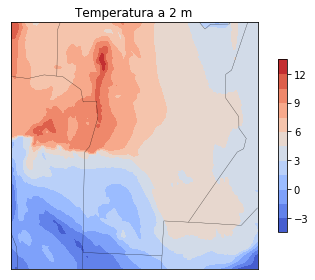

In [21]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

import cartopy.crs as crs
import cartopy._crs as _ccrs

from matplotlib.cm import get_cmap
from cartopy.feature import NaturalEarthFeature

from wrf import (to_np, getvar, smooth2d, get_cartopy,get_basemap, cartopy_xlim,
                 cartopy_ylim, latlon_coords)
import wrf

def cargar_archivo(path = '../../../../media/agustin/Linux/salidas_wrf/test01/',
                   archivo = 'wrfout_d02_2018-11-10_12:00:00',
                   var_s = 0,ts = 0, lev_s = 0, cmap = 'coolwarm', var_c1 = 0, tc1 = 0,lev_c1 = 0 , var_c2 = 0,
                   cmap_c1 = 0, tc2 = 0, lev_c2 = 0, cmap_2 = 0,
                   titulo = 'Sin titulo definido'):

    data = Dataset(path+archivo,'r')

    lat = getvar(data,'XLAT')
    lon = getvar(data,'XLONG')
    time = getvar(data,'Times')
    znw = getvar(data,'ZNW', timeidx=wrf.ALL_TIMES)
    
    if var_s != 0:
        if (type (var_s)== str) and (type(tc1) == int):
            var_s = getvar(data,var_s, timeidx = ts)
            somb = True
        else:
            print("""\033[1;32m La variable tiene que estar escrita como string y el tiempo como int \n 
                  Si no escribis tc2 por default es 0
                  \033[0m""")
            return 0
    else: somb = False

    if var_c1 != 0:
        if (type(var_c1) == str) and (type(tc1) == int):
            var_c1 = getvar(data,var_c1,timeidx= tc1)
            cont1 = False
        else: 
            print("""\033[1;32m La variable tiene que estar escrita como string y el tiempo como int \n 
                              Si no escribis tc2 por default es 0
                              \033[0m""")
            return 0
    else: cont1 = False
        
    if var_c2 != 0:
        if (type(var_c2)== str) and (type(tc1) == int):
            var_c2 = getvar(data,var_c2,timeidx=tc2)
            cont2 = False
        else: 
            print("""\033[1;32m La variable tiene que estar escrita como string y el tiempo como int \n 
                  Si no escribis tc2 por default es 0
                  \033[0m""")
            return 0
    else: cont2 = False
    

                              
    if somb == True:
            print (var_s.shape)
            var_s = var_s[lev_s,...]
            smooth_var_s = smooth2d(var_s, 3, cenweight=4)
            lats, lons = latlon_coords(var_s)

            bm = get_basemap(var_s)

    if cont1 == True:
            var_c1 = var_c1[lev_c1,...]
            smooth_var_c1 = smooth2d(var_c1, 3, cenweight=4)
            lats, lons = latlon_coords(var_c1)

            bm = get_basemap(var_c1)

    if cont2 == True:
            var_c2 = var_c2[lev_c2,...]
            smooth_var_c2 = smooth2d(var_c2, 3, cenweight=4)

    
    fig = plt.figure(figsize=(6,6))

    ax = plt.subplots(1)
    
    x, y = bm(to_np(lons), to_np(lats))

    if somb == True:
        plt.contourf(x, y, to_np(smooth_var_s),15 , cmap = plt.get_cmap(cmap))

    if cont1 == True:
        plt.contour(x,y, to_np(smooth_var_c1), cmap=get_cmap(cmap_c1) if cmap_c1 != 0 else None )
        
    if cont1 == True:
        plt.contour(x,y, to_np(smooth_var_c2), cmap=get_cmap(cmap_c2) if cmap_c2 != 0 else None)
        
    
    
    bm.drawcoastlines(linewidth=0.25)
    bm.drawstates(linewidth=0.25)
    bm.drawcountries(linewidth=0.25)
    
    plt.colorbar(shrink=.7)

    plt.title(titulo)

    plt.tight_layout()
    
    plt.show()

    
    
        
cargar_archivo(var_s = 'T',ts = 10, titulo='Temperatura a 2 m')


### Los datos de WRF estan el el disco externo

In [4]:
minlat = np.round(np.min(lat))
minlon = np.round(np.min(lon))
maxlat = np.round(np.max(lat))
maxlon = np.round(np.max(lon))

lozada = [-31.651943,-64.07947]


NameError: name 'lat' is not defined

In [1]:
def somb_cont (variable, titulo,cmap = 'viridis',  lev =0 , tiempo = 0, dl=2.):


    if len(variable.shape) == 4:
        var = variable[tiempo, lev,:,:]

    elif len(variable.shape) == 3:
        var = variable[tiempo,:,:]

    smooth_var = smooth2d(var, 3, cenweight=4)

    lats, lons = latlon_coords(var)

    bm = get_basemap(var)

    
    fig = plt.figure(figsize=(6,6))

    ax = plt.subplots(1)
    

    x, y = bm(to_np(lons), to_np(lats))

    plt.contourf(x, y, to_np(smooth_var),15 , cmap=get_cmap(cmap))

    [ptlat,ptlon] = [-31.651739700-dl/2.,-64.097784300-dl/2.]

    bm.plot([ptlon,ptlon],[ptlat,ptlat+dl],'-k',linewidth=2)
    bm.plot([ptlon,ptlon+dl],[ptlat+dl,ptlat+dl],'-k',linewidth=2)
    bm.plot([ptlon+dl,ptlon+dl],[ptlat+dl,ptlat],'-k',linewidth=2)
    bm.plot([ptlon+dl,ptlon],[ptlat,ptlat],'-k',linewidth=2)
    
    
    bm.drawcoastlines(linewidth=0.25)
    bm.drawstates(linewidth=0.25)
    bm.drawcountries(linewidth=0.25)
    
    plt.colorbar(shrink=.7)

    plt.title(titulo)

    plt.tight_layout()
    
    plt.show()

somb_cont(variable= t ,tiempo = 0, cmap = 'coolwarm', titulo = 'Temperatura')

NameError: name 't' is not defined

In [7]:
x,y = m(255,146)
x_,y_ = m(lat,lon)
#plt.subplot2grid((1,2),(0,0))
m.imshow(t[0,10,:,:],cmap=plt.get_cmap('coolwarm'))
m.scatter(146,255)#,s=1000)

#plt.scatter(x,y,marker='o',s=100,color='r')
m.drawparallels(np.arange(minlat,maxlat,5),labels = [0.5,0,0,0], fontsize = 10, linewidth = 0.4)
m.drawmeridians(np.arange(minlon,maxlon,10),labels=[0,0,0,0.3],fontsize = 10, linewidth = 0.4)
m.drawcoastlines(linewidth = 0.6)
m.drawcountries(linewidth = 0.5)
m.drawstates(linewidth = 0.4)
lon_ = lon[0,146]
lat_ = lat[255,0]
x,y = m(lon_, lat_)
loz = m.plot(x, y, 'bo', markersize=24)
#plt.plot(146,255,marker='o',color='r')

plt.show()

NameError: name 'm' is not defined

IndexError: too many indices

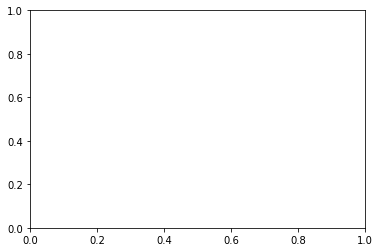

In [120]:
fig ,ax= plt.subplots(1)

dl=2.
[ptlat,ptlon] = [-31.651739700-dl/2.,-64.097784300-dl/2.]
plt.contourf(lon[0,:,:],lat[0,:,:],t[0,0,:,:])
plt.plot([ptlon,ptlon],[ptlat,ptlat+dl],'-k',linewidth=2)
plt.plot([ptlon,ptlon+dl],[ptlat+dl,ptlat+dl],'-k',linewidth=2)
plt.plot([ptlon+dl,ptlon+dl],[ptlat+dl,ptlat],'-k',linewidth=2)
plt.plot([ptlon+dl,ptlon],[ptlat,ptlat],'-k',linewidth=2)
#a= mpach.Rectangle((210,116),40,30,linewidth=1,edgecolor='r',facecolor='none')
#ax.add_patch(a)

plt.show()